## Задачи
1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя **sns.countplot** (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
## Описание данных
**user_data:**

* client – идентификатор пользователя

* premium – является ли клиент премиум

* age – возраст

**logs:**

* client – идентификатор пользователя

* success – результат (успех - 1, нет - 0)

* platform – платформа

* time – время в формате Unix

**1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику.**

**Вопрос:** Сколько уникальных значений принимает переменная platform?

In [2]:
import pandas as pd
u=pd.read_csv('3_user_data.csv')
l=pd.read_csv('3_logs.csv')

In [5]:
u.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [4]:
l.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [4]:
u.shape

(2954, 3)

In [5]:
l.shape

(4500, 4)

In [6]:
u.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [7]:
l.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [10]:
u.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [11]:
l.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [8]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [9]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [6]:
l.info().platform.nunique()

3

Ответ: `3`

**2. Какой клиент совершил больше всего успешных операций?**

**Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:**

12, 123, 456

In [41]:
lc=l.query('success==True').client.value_counts()
lm=lc.max()
max_suc_users=lc.loc[lc==lm]
max_suc_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

Ответ: `12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584`

**3. С какой платформы осуществляется наибольшее количество успешных операций?**

In [42]:
#l.query('success==True').platform.value_counts().idxmax()
l[l.success==True].platform.value_counts().idxmax()

platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

* Computer
* Web
* **Phone**
* Tablet

**4. Какая платформа наиболее популярна среди премиумных клиентов?**

In [12]:
u.merge(l, on='client').query('premium==True').platform.value_counts().idxmax()

'phone'

* Tablet
* **Phone**
* Web
* Computer

**5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?**

**Используйте датасэт, который вы получили на предыдущем шаге**

![](https://ucarecdn.com/6312cd54-c828-4712-a002-b0a895159f61/)

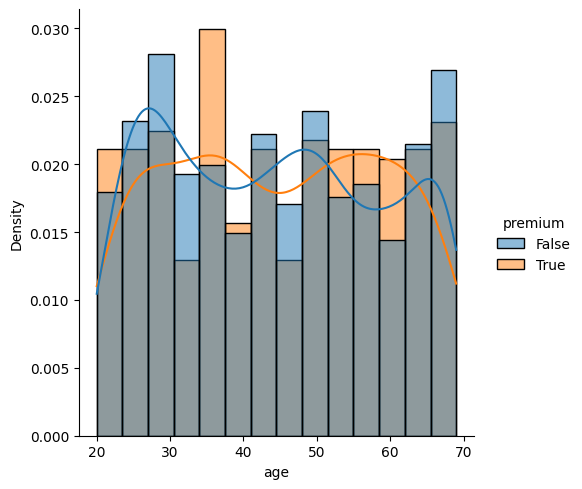

In [56]:
import seaborn as sns
ul=u.merge(l, on='client')  #датасет другой по заданию
sns.displot(data=ul, x='age', 
            hue='premium', 
            kde=True, 
            kind='hist', 
            stat='density', 
            common_norm=False, 
            bins=14)

* A
* **B**
* C
* D

**6. Постройте график распределения числа успешных операций:**

x – число успешных операций

y – число клиентов, совершивших столько успешных операций

<Axes: xlabel='count', ylabel='count'>

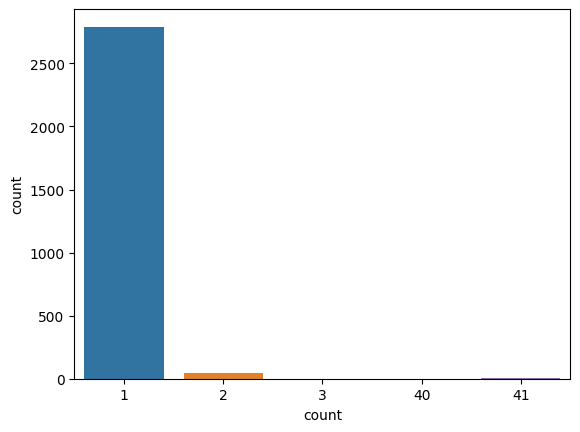

In [79]:
lc=l[l.success==True].client.value_counts()
#lc=lc.rename('values')
sns.countplot(x=lc)

* **Несколько клиентов совершили более 40 успешных действий**
* Все клиенты совершили не более 5 успешных операций
* Бóльшая часть наблюдений сосредоточена в правой части графика
* **Бóльшая часть наблюдений сосредоточена в левой части графика**

**7. ⭐️Задание со звёздочкой!⭐️**

**Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.**

Полезные ссылки:

[sns.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) – документация к типу графика

[figsize](https://lab.karpov.courses/learning/88/module/1103/lesson/9728/28498/133083/) – про размер графиков

**Вопрос**: Клиенты какого возраста совершили наибольшее количество успешных действий?

<Axes: xlabel='age', ylabel='count'>

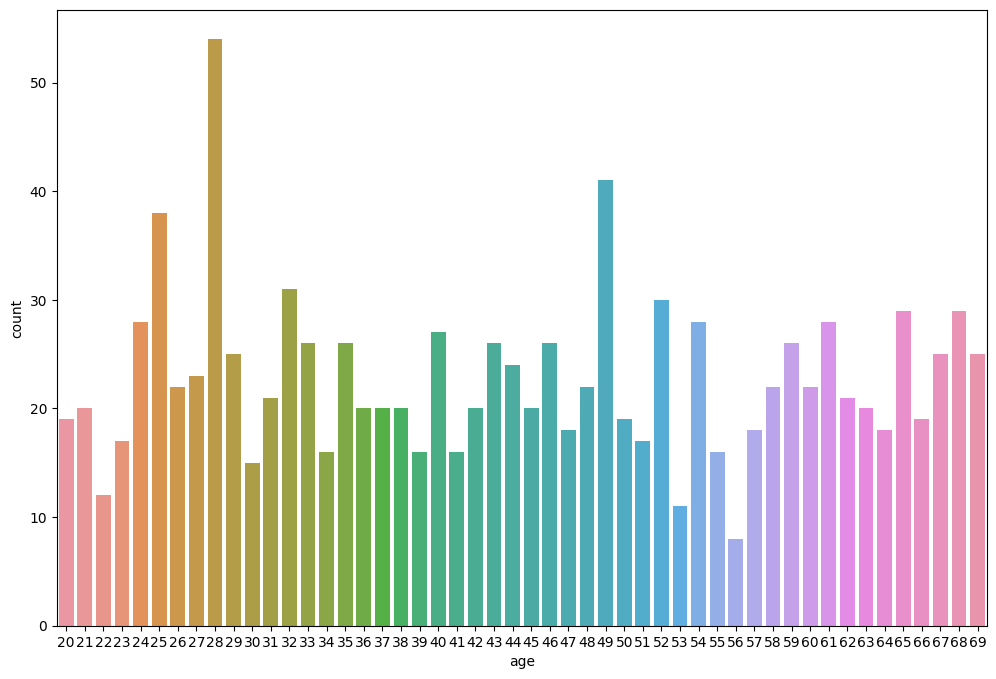

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(x='age',data=l.merge(u, on='client').query('success==True' and 'platform=="computer"')) #,hue='age')


Ответ: `28`